In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
compiled = pd.read_excel('../data/TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx', sheet_name= 'Compiled_IFSP Teaming')
intake = pd.read_excel('../data/TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx', sheet_name= 'All Children with IFSPs')

c:\Users\patri\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
compiled = compiled
intake = intake

# 4. Does participation vary by service type? by service setting? by point of entry?

In [4]:
compiled_thin = compiled[['CHILD_ID', 'SERVICE_DATE','SERVICE_SETTING','ADD_USER', 'IFSP Teaming ID name','Agency Name','Agency Type', 'Service Name']]
compiled_thin = compiled_thin.rename(columns = {'CHILD_ID':'child_id', 
                                                'SERVICE_DATE':'service_date',
                                                'SERVICE_SETTING':'service_setting',
                                                'ADD_USER':'add_user', 
                                                'IFSP Teaming ID name':'meeting_type',
                                                'Agency Name':'agency_name',
                                                'Agency Type':'agency_type', 
                                                'Service Name':'service_type'})

In [5]:
intake_clean = intake.rename(columns= {'POE':'poe',
                                             'Child ID':'child_id',
                                             'Referral Date': 'referral_date',
                                             'Exit Date':'exit_date'})
intake_clean = intake_clean.drop_duplicates()

In [6]:
child_visits2 = compiled['CHILD_ID'].value_counts().reset_index().rename(columns = {'index':'child_id', 'CHILD_ID':'visit_count'})
intake_visit = pd.merge(intake_clean, child_visits2, how= 'left', on='child_id')
intake_visit['visit_count'] = intake_visit['visit_count'].fillna(0)

# all intake

In [7]:
intake_visit.shape

(28654, 5)

In [8]:
intake_visit

,poe,child_id,referral_date,exit_date,visit_count
0,ET,508615,2021-08-06,NaT,1.0
1,ET,488455,2021-11-02,NaT,0.0
2,ET,494500,2020-12-14,NaT,0.0
3,ET,515143,2021-11-22,NaT,1.0
4,ET,505490,2021-06-15,NaT,0.0
...,...,...,...,...,...
28649,UC,541668,2022-11-28,NaT,0.0
28650,UC,484305,2023-01-09,NaT,0.0
28651,UC,540987,2022-11-16,NaT,0.0
28652,UC,526430,2022-07-19,2023-02-13,0.0


In [82]:
sns.set_theme()
# sns.set_context("talk")
# colors = ["#B1301F", "#EF412A", "#343434", "#777776", "#C7CAD5", "#7099E9", "#415A8C", "#161616", "#F3EDE4"]
# Color codes
colors = ["#B1301F", "#EF412A", "#343434", "#777776", "#C7CAD5", "#7099E9", "#415A8C", "#161616"]
sns.set_palette(colors) 
colors2=[ "#B1301F"]
colors3 = ['#EF412A']

<Axes: xlabel='visit_count', ylabel='poe'>

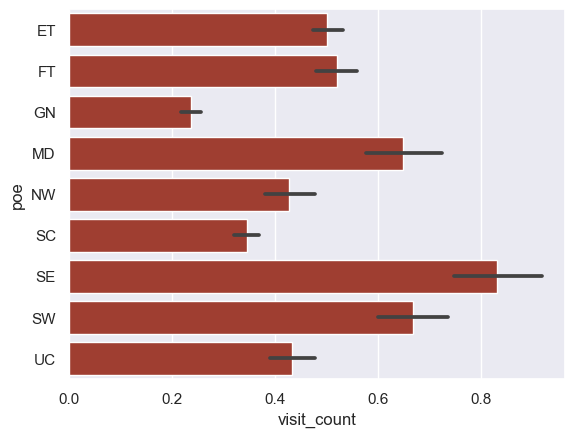

In [10]:
sns.barplot(intake_visit, orient='h', y='poe', x='visit_count', palette=colors2)

In [11]:
iv_graph = intake_visit.groupby('poe').mean().sort_values('visit_count', ascending=False).reset_index()
iv_graph = iv_graph.reindex([2,0,5,1,3,4,7,6,8])
iv_graph = iv_graph.reset_index(drop=True)

C:\Users\patri\AppData\Local\Temp\ipykernel_16300\1169412487.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  iv_graph = intake_visit.groupby('poe').mean().sort_values('visit_count', ascending=False).reset_index()


In [12]:
iv_graph

,poe,child_id,visit_count
0,MD,510640.246327,0.648874
1,SE,508478.735035,0.830626
2,UC,509903.155744,0.432253
3,SW,510189.768038,0.668240
4,FT,508842.799858,0.519517
5,ET,508788.249948,0.501769
6,SC,509854.893587,0.344563
7,NW,509925.659654,0.427498
8,GN,510759.369504,0.236789


# all intake min 1 visit

In [13]:
iv_min_1 = intake_visit[intake_visit['visit_count'] >0]
iv_min_1.shape

(6924, 5)

In [14]:
iv_min_1

,poe,child_id,referral_date,exit_date,visit_count
0,ET,508615,2021-08-06,NaT,1.0
3,ET,515143,2021-11-22,NaT,1.0
8,ET,488500,2020-08-27,2022-02-17,1.0
14,ET,476451,2020-02-12,NaT,3.0
21,ET,486336,2020-07-20,NaT,1.0
...,...,...,...,...,...
28556,UC,508173,2021-07-29,2023-02-02,3.0
28568,UC,490975,2020-10-09,2023-02-09,2.0
28569,UC,517966,2022-01-25,2023-01-20,1.0
28614,UC,521535,2022-02-07,2023-02-07,2.0


In [15]:
iv_min_1 = iv_min_1.sort_values('visit_count', ascending=False)

In [16]:
iv_min_1_graph = iv_min_1.groupby('poe').mean().sort_values('visit_count', ascending=False).reset_index()
iv_min_1_graph

C:\Users\patri\AppData\Local\Temp\ipykernel_16300\2867373885.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  iv_min_1_graph = iv_min_1.groupby('poe').mean().sort_values('visit_count', ascending=False).reset_index()


,poe,child_id,visit_count
0,MD,502080.750611,3.239609
1,SE,503183.007752,2.312661
2,UC,505605.058431,1.959933
3,SW,504397.157171,1.946955
4,FT,504839.538077,1.827715
5,ET,503420.046460,1.778024
6,SC,504735.370661,1.660694
7,NW,502405.517711,1.550409
8,GN,505049.308550,1.454771


In [17]:
iv_min_1_graph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   poe          9 non-null      object 
 1   child_id     9 non-null      float64
 2   visit_count  9 non-null      float64
dtypes: float64(2), object(1)
memory usage: 344.0+ bytes


<Axes: xlabel='visit_count', ylabel='poe'>

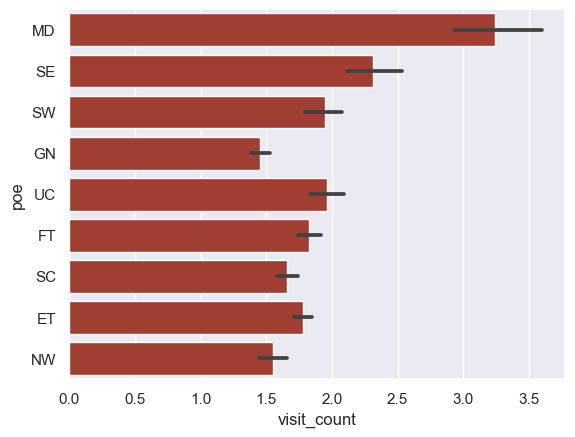

In [18]:
sns.barplot(iv_min_1, orient='h', y='poe', x='visit_count', palette=colors2)

<Axes: xlabel='visit_count', ylabel='poe'>

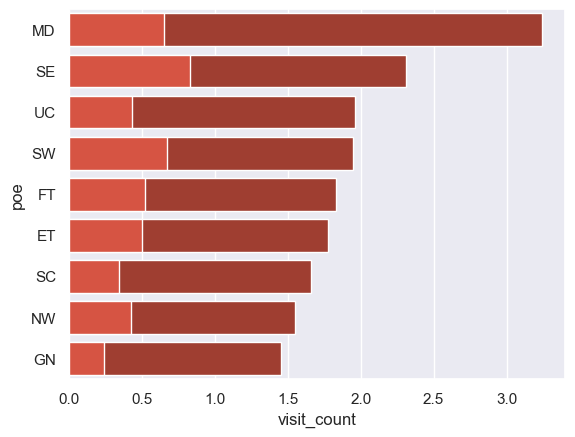

In [19]:
sns.barplot(iv_min_1_graph, orient='h', y='poe', x='visit_count', palette=colors2)
sns.barplot(iv_graph, orient='h', y='poe', x='visit_count', palette=colors3, order = iv_graph['poe'])

In [20]:
iv_min_6 = iv_min_1[iv_min_1['visit_count'] >6]

<Axes: xlabel='visit_count', ylabel='poe'>

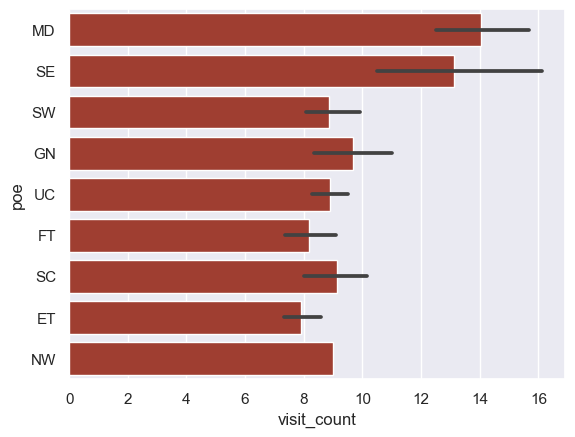

In [23]:
# sns.set_theme()
# sns.set_context("talk")
sns.barplot(data = iv_min_6,
            orient= 'h', x='visit_count', y='poe',
            palette=colors2)

# aged out

In [24]:
age_out = intake_visit[intake_visit['exit_date'].notnull()]
age_out.shape

(9980, 5)

# aged out min 1

In [25]:
age_out_min_1 = age_out[age_out['visit_count'] >0]
age_out_min_1.shape

(2131, 5)

In [26]:
age_out_min_1['days_in_program'] = age_out_min_1['exit_date'] - age_out_min_1['referral_date']
age_out_min_1['visit_rate'] = age_out_min_1['days_in_program']/age_out_min_1['visit_count']
age_out_min_1['day_in_program_redux'] = (age_out_min_1['days_in_program']/ np.timedelta64(1, 'D')).astype(int)
age_out_min_1['visit_rate_redux'] = age_out_min_1['day_in_program_redux']/age_out_min_1['visit_count']
age_out_min_1 = age_out_min_1.drop(columns = ['days_in_program', 'visit_rate'], axis=0)

C:\Users\patri\AppData\Local\Temp\ipykernel_16300\1605984240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_out_min_1['days_in_program'] = age_out_min_1['exit_date'] - age_out_min_1['referral_date']
C:\Users\patri\AppData\Local\Temp\ipykernel_16300\1605984240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_out_min_1['visit_rate'] = age_out_min_1['days_in_program']/age_out_min_1['visit_count']
C:\Users\patri\AppData\Local\Temp\ipykernel_16300\1605984240.py:3: SettingWithCopyWarning: 
A value

In [27]:
age_out_min_1_avg = age_out_min_1.groupby('poe').mean().reset_index()

C:\Users\patri\AppData\Local\Temp\ipykernel_16300\506271706.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_out_min_1_avg = age_out_min_1.groupby('poe').mean().reset_index()


In [28]:
age_out_min_1_avg

,poe,child_id,visit_count,day_in_program_redux,visit_rate_redux
0,ET,496727.961832,1.748092,537.623410,393.771011
1,FT,498990.591837,1.689796,524.979592,394.981380
2,GN,499105.220779,1.398268,506.740260,418.845887
3,MD,497107.111524,3.330855,551.702602,342.784561
4,NW,497500.818898,1.590551,532.283465,411.324541
5,SC,500472.131387,1.609489,499.313869,392.687635
6,SE,497022.132530,2.120482,516.084337,349.095973
7,SW,498448.785276,1.797546,493.950920,342.675521
8,UC,500978.627778,1.927778,490.444444,339.188810


<Axes: xlabel='visit_rate_redux', ylabel='poe'>

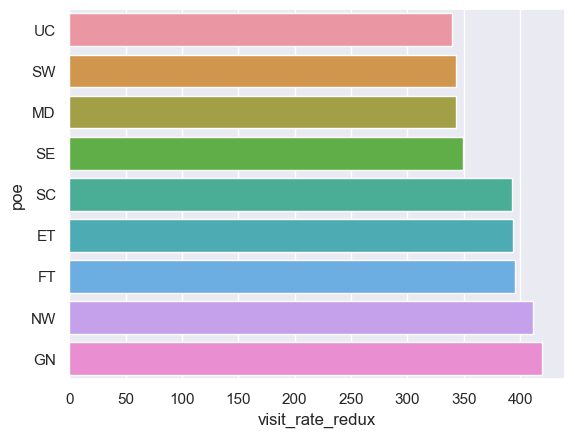

In [29]:
sns.barplot(age_out_min_1_avg, 
            orient='h', x='visit_rate_redux', y='poe',
            order = age_out_min_1_avg.sort_values('visit_rate_redux').poe)

In [30]:
compiled['IFSP Teaming ID name'].value_counts()

IFSP Meeting    4820
Co-Visit        4091
IEP Meeting      632
Name: IFSP Teaming ID name, dtype: int64

<Axes: xlabel='poe', ylabel='visit_count'>

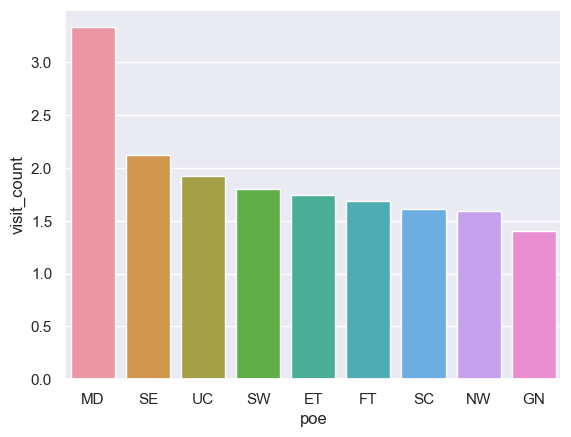

In [31]:
sns.barplot(age_out_min_1_avg, 
            orient='v', x='poe', y='visit_count', 
            order= age_out_min_1_avg.sort_values('visit_count', ascending=False).poe)

# probably a rabbit hole

In [32]:
intake_complete = intake_visit
intake_complete['exit_date'] = intake_complete['exit_date'].fillna('2023-01-31')

In [33]:
intake_complete['days_in_program'] = intake_complete['exit_date'] - intake_complete['referral_date']
intake_complete['visit_rate'] = intake_complete['days_in_program']/intake_complete['visit_count']
intake_complete['day_in_program_redux'] = (intake_complete['days_in_program']/ np.timedelta64(1, 'D')).astype(int)
intake_complete['visit_rate_redux'] = intake_complete['day_in_program_redux']/intake_complete['visit_count']
intake_complete = intake_complete.drop(columns = ['days_in_program', 'visit_rate'], axis=0)

In [34]:
ic_0_mean = intake_complete[intake_complete['visit_count'] == 0].groupby('poe').mean().reset_index()

C:\Users\patri\AppData\Local\Temp\ipykernel_16300\885880866.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ic_0_mean = intake_complete[intake_complete['visit_count'] == 0].groupby('poe').mean().reset_index()


In [35]:
ic_0_mean

,poe,child_id,visit_count,day_in_program_redux,visit_rate_redux
0,ET,510898.799072,0.0,394.641055,NaN
1,FT,510432.592960,0.0,408.659395,NaN
2,GN,511869.468080,0.0,390.901710,NaN
3,MD,512784.051439,0.0,366.463870,NaN
4,NW,512788.618257,0.0,371.438797,NaN
5,SC,511195.184990,0.0,403.541777,NaN
6,SE,511446.796524,0.0,383.236061,NaN
7,SW,513216.912731,0.0,363.579055,NaN
8,UC,511119.291923,0.0,402.448748,NaN


<Axes: xlabel='day_in_program_redux', ylabel='poe'>

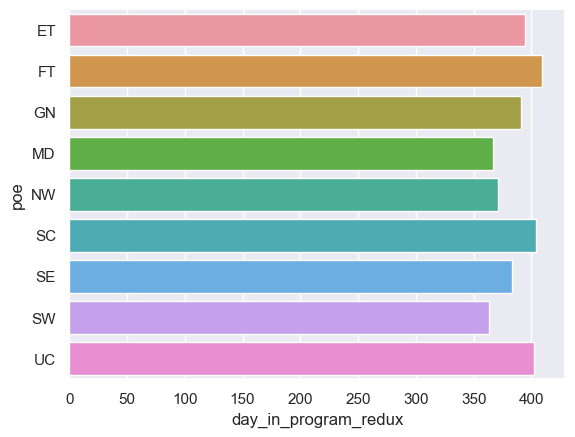

In [36]:
sns.barplot(ic_0_mean, orient='h', y='poe', x='day_in_program_redux')

In [37]:
ic_min_1_mean = intake_complete[intake_complete['visit_count'] > 0].groupby('poe').mean().reset_index()

C:\Users\patri\AppData\Local\Temp\ipykernel_16300\2611210609.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ic_min_1_mean = intake_complete[intake_complete['visit_count'] > 0].groupby('poe').mean().reset_index()


In [38]:
ic_min_1_mean

,poe,child_id,visit_count,day_in_program_redux,visit_rate_redux
0,ET,503420.046460,1.778024,555.404867,399.327453
1,FT,504839.538077,1.827715,534.588015,388.466506
2,GN,505049.308550,1.454771,533.584882,434.834424
3,MD,502080.750611,3.239609,582.317848,366.862372
4,NW,502405.517711,1.550409,558.580381,433.170512
5,SC,504735.370661,1.660694,537.381859,415.361834
6,SE,503183.007752,2.312661,544.736434,353.306250
7,SW,504397.157171,1.946955,524.231827,356.805298
8,UC,505605.058431,1.959933,527.358932,369.420496


<Axes: xlabel='day_in_program_redux', ylabel='poe'>

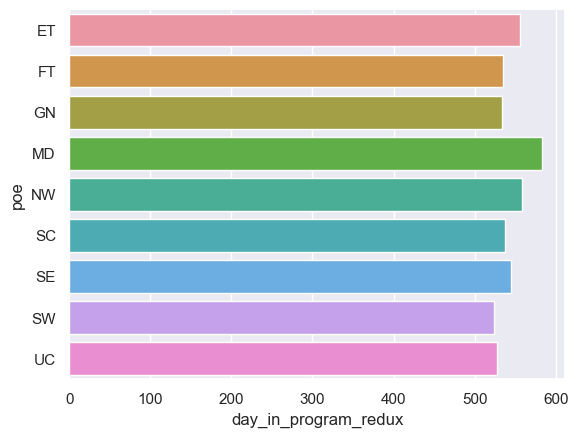

In [39]:
sns.barplot(ic_min_1_mean, orient='h', y='poe', x='day_in_program_redux')

<Axes: xlabel='visit_rate_redux', ylabel='poe'>

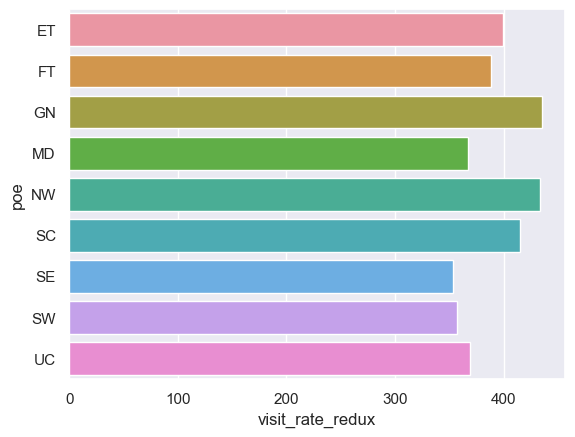

In [40]:
sns.barplot(ic_min_1_mean, orient='h', y='poe', x='visit_rate_redux')

# getting number of add_user per region

In [43]:
compiled_thin_user = compiled_thin[['child_id', 'add_user']]
compiled_thin_user

,child_id,add_user
0,457136,LEECAROL1
1,457136,LEECAROL1
2,457585,MILLARDCATHERINE
3,457852,HEMELKATIE1
4,458051,JONESMEGAN
...,...,...
9538,541337,WESTAMY
9539,541511,WESTAMY
9540,541890,WESTAMY
9541,542077,FANELLASAMANTHA


In [51]:
compiled_thin_user.nunique()

child_id    4789
add_user     529
dtype: int64

In [46]:
intake_user = intake_clean[['poe', 'child_id']]
intake_user

,poe,child_id
0,ET,508615
1,ET,488455
2,ET,494500
3,ET,515143
4,ET,505490
...,...,...
138654,UC,541668
138656,UC,484305
138661,UC,540987
138662,UC,526430


In [59]:
child_list_compiled = compiled_thin_user.value_counts('child_id').reset_index().rename(columns={'Index':'child_id', 'child_id':'visit_count'})
child_list_compiled

,visit_count,0
0,494031,48
1,480109,34
2,501065,32
3,481017,31
4,494794,31
...,...,...
4784,505287,1
4785,505291,1
4786,505293,1
4787,505307,1


In [62]:
child_list_compiled = child_list_compiled.rename(columns={'visit_count':'child_id', 0:'visit_count'})

In [63]:
child_poe = pd.merge(child_list_compiled, intake_user, how='left', on='child_id')
child_poe

,child_id,visit_count,poe
0,494031,48,MD
1,480109,34,MD
2,501065,32,SE
3,481017,31,SE
4,494794,31,MD
...,...,...,...
6920,505291,1,FT
6921,505293,1,GN
6922,505293,1,GN
6923,505307,1,SC


In [65]:
child_user_poe = pd.merge(compiled_thin_user, child_poe, how='left', on='child_id')
child_user_poe

,child_id,add_user,visit_count,poe
0,457136,LEECAROL1,2,SE
1,457136,LEECAROL1,2,SE
2,457136,LEECAROL1,2,SE
3,457136,LEECAROL1,2,SE
4,457585,MILLARDCATHERINE,1,SE
...,...,...,...,...
13702,541337,WESTAMY,1,UC
13703,541511,WESTAMY,1,UC
13704,541890,WESTAMY,1,UC
13705,542077,FANELLASAMANTHA,1,ET


In [66]:
user_poe = child_user_poe.drop_duplicates('add_user')
user_poe

,child_id,add_user,visit_count,poe
0,457136,LEECAROL1,2,SE
4,457585,MILLARDCATHERINE,1,SE
5,457852,HEMELKATIE1,1,ET
6,458051,JONESMEGAN,1,GN
7,458230,BROWNSTEPHANIE,1,ET
...,...,...,...,...
13642,536235,GARCIACARMEN,1,ET
13657,536933,QUINNEMILY,2,FT
13663,537078,AVERYALICIA,1,SE
13679,538364,CALDWELLHANNAHJANE,1,ET


In [69]:
user_poe_2 = user_poe.value_counts('poe').reset_index()

In [74]:
user_poe_2 = user_poe_2.reindex([1,5,6,7,4,0,3,8,2])
user_poe_2 = user_poe_2.rename(columns = {0:'user_count'})
user_poe_2

,poe,user_count
1,MD,90
5,SE,51
6,UC,42
7,SW,41
4,FT,53
0,ET,101
3,SC,59
8,NW,20
2,GN,72


In [77]:
child_poe_2 = child_poe.value_counts('poe').reset_index()

In [80]:
child_poe_2.reindex([2,5,6,7,4,0,1,8,3])
child_poe_2 = child_poe_2.rename(columns = {0:'child_count'})
child_poe_2

,poe,child_count
0,ET,1356
1,SC,893
2,MD,818
3,GN,807
4,FT,801
5,SE,774
6,UC,599
7,SW,509
8,NW,367


<Axes: xlabel='visit_count', ylabel='poe'>

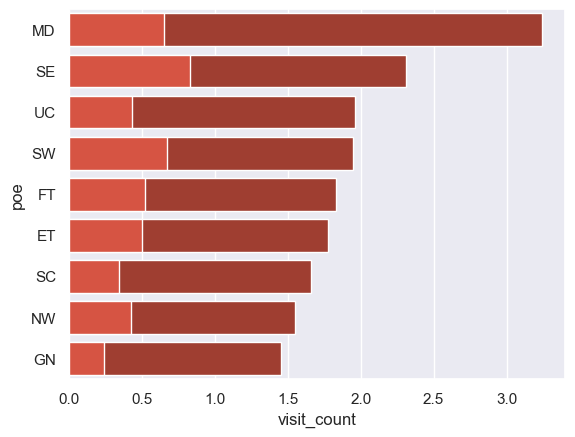

In [68]:
sns.barplot(iv_min_1_graph, orient='h', y='poe', x='visit_count', palette=colors2)
sns.barplot(iv_graph, orient='h', y='poe', x='visit_count', palette=colors3, order = iv_graph['poe'])

<Axes: xlabel='user_count', ylabel='poe'>

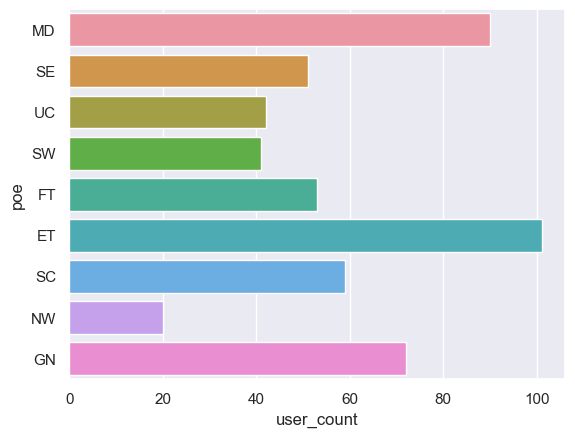

In [76]:
sns.barplot(user_poe_2, orient='h', y='poe',x='user_count')